In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("./titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
##사이킷런 알고리즘은 null값을 허용하지 않으므로 결측치를 고정값 또는 평균값 등으로 바꿔야합니다.
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print(titanic_df.isnull().sum())

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin']

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [58]:
##어떤 유형의 고객이 생존 확률이 높은지 알아보도록 하겠습니다.
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

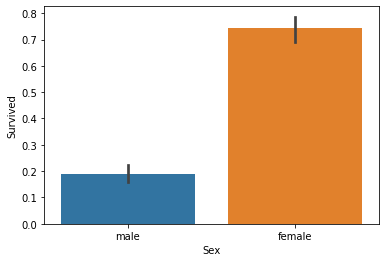

In [59]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

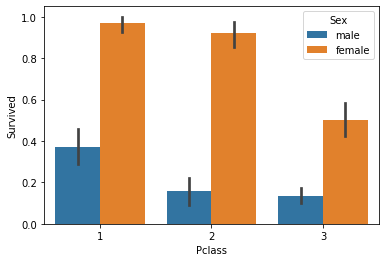

In [60]:
##부자와 가난한 사람 간 생존률을 성별에 따라 그래프로 그리면 다음과 같습니다.
sns.barplot(x = 'Pclass', y='Survived', hue = 'Sex', data = titanic_df)

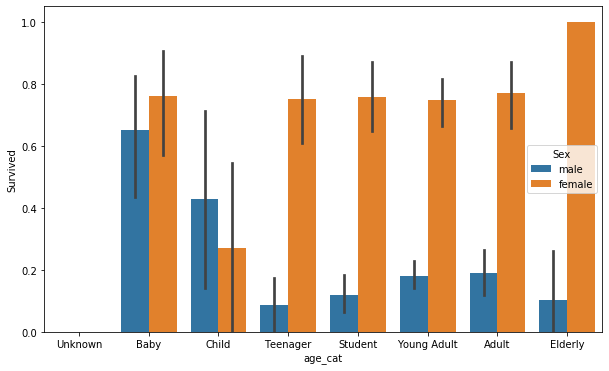

In [61]:
##나이에 따른 생존률을 살펴보도록 하겠습니다.

def get_category(age):
    cat = ""
    if age<=-1:
        cat = "Unknown"
    elif age<=5:
        cat = "Baby"
    elif age<=12:
        cat = "Child"
    elif age<=18:
        cat = "Teenager"
    elif age<=25:
        cat = "Student"
    elif age<=35:
        cat = "Young Adult"
    elif age <=60:
        cat = "Adult"
    else:
        cat = "Elderly"
    return cat


plt.figure(figsize=(10,6))

group_names = ["Unknown",'Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('age_cat', axis = 1, inplace = True)

In [62]:
'''
지금까지의 결과를 보면 age, sex, pclass가 생존률에 큰 영향을 주는 것을 알 수 있습니다.
다음은 남아있는 문자열 카테고리를 숫자형 카테고리 피처로 변형하도록 하겠습니다.
이떄 앞서 다뤘던 label enooding을 이용합니다.
'''

'\n지금까지의 결과를 보면 age, sex, pclass가 생존률에 큰 영향을 주는 것을 알 수 있습니다.\n다음은 남아있는 문자열 카테고리를 숫자형 카테고리 피처로 변형하도록 하겠습니다.\n이떄 앞서 다뤘던 label enooding을 이용합니다.\n'

In [63]:
##카테고리 피처를 숫자형 카테고리 피처로 바꾸기
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex','Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(5)
        
        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


In [65]:
##지금까지 다룬 전처리 과정들을 함수로 분할하여 재사용할 수 있도록 하고 이를 이용하여 머신러넝 모델을 만들어보도록 하겠습니다.

from sklearn.preprocessing import LabelEncoder

##null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

##불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

##레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#전처리 함수들 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [66]:
##타이타닉 데이터를 X,y로 구분하도록 하겠습니다.
titanic_df = pd.read_csv('./titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 20, random_state = 11)

In [68]:
##결정트리, 랜덤포레스트, 로지스틱 회귀를 통해 생존자를 예측해보도록하겠습니다. 자세한 알고리즘들은 나중에 다루도록 하겠습니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
import warnings
warnings.filterwarnings(action='ignore')

dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 10)
lr_clf = LogisticRegression()


dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("{0}".format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("{0}".format(accuracy_score(rf_pred, y_test)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("{0}".format(accuracy_score(lr_pred, y_test)))

0.9
0.9
0.9


In [80]:
##KFold를 이용해서 결정트리모델을 더 평가해 보도록 하겠습니다.
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        accuracy = accuracy_score(predictions, y_test)
        scores.append(accuracy)
        print("교차검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    mean_score =np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
exec_kfold(dt_clf, folds = 5)

교차검증 0 정확도: 0.7542
교차검증 1 정확도: 0.7809
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7697
교차검증 4 정확도: 0.8202
평균 정확도: 0.7823
